  # UNICORNS DATA SET
  

# The data set is obtained from [kaggle](https://www.kaggle.com/datasets/thedevastator/startups-valued-at-1-billion-or-more).

## Table of contents
1. Step 1: Answering the question
2. Step 2: Checking the data
3. Step 3: Tidying the data
    - Bonus: Testing our data
4. Step 4: Exploratory analysis

  ### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the file and converting it to dataframe

In [2]:
df = pd.read_csv("unicorns.csv")

In [3]:
unicorns= pd.DataFrame(df)

### Checking shape, data types and looking into the few rows of data

In [4]:
unicorns.shape

(1199, 11)

In [5]:
unicorns.columns

Index(['Updated at', 'Company', 'Crunchbase Url', 'Last Valuation (Billion $)',
       'Date Joined', 'Year Joined', 'City', 'Country', 'Industry',
       'Investors', 'Company Website'],
      dtype='object')

In [6]:
unicorns.head()

,Updated at,Company,Crunchbase Url,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors,Company Website
0,"10/31/2022, 2:37:05 AM",Esusu,https://www.cbinsights.com/company/esusu,1.0,1/27/2022,2022,New York,United States,Fintech,"[""Next Play Ventures"",""Zeal Capital Partners"",...",NaN
1,"10/31/2022, 2:37:05 AM",Fever Labs,https://www.cbinsights.com/company/fever-labs,1.0,1/26/2022,2022,New York,United States,Internet software & services,"[""Accel"",""14W"",""GS Growth""]",NaN
2,"10/31/2022, 2:37:04 AM",Minio,https://www.cbinsights.com/company/minio,1.0,1/26/2022,2022,Palo Alto,United States,Data management & analytics,"[""General Catalyst"",""Nexus Venture Partners"",""...",NaN
3,"10/31/2022, 2:37:04 AM",Darwinbox,https://www.cbinsights.com/company/darwinbox,1.0,1/25/2022,2022,Hyderabad,India,Internet software & services,"[""Lightspeed India Partners"",""Sequoia Capital ...",NaN
4,"10/31/2022, 2:37:04 AM",Pentera,https://www.cbinsights.com/company/pcysys,1.0,1/11/2022,2022,Petah Tikva,Israel,Cybersecurity,"[""AWZ Ventures"",""Blackstone"",""Insight Partners""]",NaN


In [7]:
unicorns.dtypes

Updated at                     object
Company                        object
Crunchbase Url                 object
Last Valuation (Billion $)    float64
Date Joined                    object
Year Joined                     int64
City                           object
Country                        object
Industry                       object
Investors                      object
Company Website               float64
dtype: object

### Dropping unnecessary columns

In [8]:
unicorns["Updated at"].value_counts()

10/31/2022, 2:35:46 AM    6
10/31/2022, 2:34:08 AM    6
10/31/2022, 2:35:37 AM    6
10/31/2022, 2:35:58 AM    6
10/31/2022, 2:35:16 AM    6
                         ..
10/31/2022, 2:35:36 AM    3
10/31/2022, 2:34:09 AM    3
10/31/2022, 2:32:39 AM    2
10/31/2022, 2:36:51 AM    2
10/31/2022, 2:32:38 AM    2
Name: Updated at, Length: 279, dtype: int64

In [9]:
unicorns = unicorns.drop(["Company Website", "Crunchbase Url","Updated at"], axis = 1)

### Checking null values if any

In [10]:
unicorns.isnull().any().sum()

1

In [11]:
unicorns.isnull().sum()

Company                        0
Last Valuation (Billion $)     0
Date Joined                    0
Year Joined                    0
City                          18
Country                        0
Industry                       0
Investors                      0
dtype: int64

### Checking what to do with null values, either drop the null values or fill with some values according to your knowledge or using statistics or applying machine learning model to it .(Standardization and Normalization)

 #### "City" <br>
 Based on the most number of startups in a particular city of a country we can fill the null values of city but that would be misleading we don't need to do predictive modeling here and the number of missing values are also very less.   <br> Also the data is very less which can lead to overfitting. <br> It's better to use country rather than city column or drop the null values of city as per the need.

### Cleaning Data, Finding incosistencies removing them

In [12]:
unicorns["Country"].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
       'Bermuda', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia',
       'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Netherlands',
       'Nigeria', 'Norway', 'Philippines', 'Senegal', 'Seychelles',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vietnam'], dtype=object)

In [13]:
unicorns["Industry"].sort_values().unique()

array(['Artificial Intelligence', 'Artificial intelligence',
       'Artificial intelligence ', 'Auto & transportation',
       'Auto & transportation ', 'Consumer & retail',
       'Consumer & retail ', 'Cybersecurity', 'Cybersecurity ',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

In [14]:
unicorns["Industry"] = unicorns["Industry"].str.lower()

In [15]:
unicorns["Industry"].sort_values().unique()

array(['artificial intelligence', 'artificial intelligence ',
       'auto & transportation', 'auto & transportation ',
       'consumer & retail', 'consumer & retail ', 'cybersecurity',
       'cybersecurity ', 'data management & analytics',
       'e-commerce & direct-to-consumer', 'edtech', 'fintech', 'hardware',
       'health', 'internet software & services',
       'mobile & telecommunications', 'other',
       'supply chain, logistics, & delivery', 'travel'], dtype=object)

In [16]:
unicorns["Industry"]=unicorns["Industry"].str.strip()

In [17]:
unicorns["Industry"].sort_values().unique()

array(['artificial intelligence', 'auto & transportation',
       'consumer & retail', 'cybersecurity',
       'data management & analytics', 'e-commerce & direct-to-consumer',
       'edtech', 'fintech', 'hardware', 'health',
       'internet software & services', 'mobile & telecommunications',
       'other', 'supply chain, logistics, & delivery', 'travel'],
      dtype=object)

### Checking and dropping duplicates

In [18]:
unicorns[unicorns.duplicated()]

,Company,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors


In [19]:
unicorns["Company"].value_counts()

Branch              2
Bolt                2
Fabric              2
Esusu               1
Gymshark            1
                   ..
Turing              1
GlobalBees          1
UISEE Technology    1
56PINGTAI           1
Veepee              1
Name: Company, Length: 1196, dtype: int64

In [20]:
unicorns.loc[unicorns["Company"].isin(["Branch","Bolt","Fabric"])].sort_values("Company")

,Company,Last Valuation (Billion $),Date Joined,Year Joined,City,Country,Industry,Investors
766,Bolt,11.00,10/8/2021,2021,San Francisco,United States,fintech,"[""Activant Capital"",""Tribe Capital"",""General A..."
1060,Bolt,8.40,5/29/2018,2018,Tallinn,Estonia,auto & transportation,"[""Didi Chuxing"",""Diamler"",""TMT Investments""]"
73,Branch,1.05,3/1/2022,2022,Columbus,United States,fintech,"[""American Family Ventures"",""Greycroft"",""Signa..."
1043,Branch,4.00,9/10/2018,2018,Redwood City,United States,mobile & telecommunications,"[""New Enterprise Associates"",""Pear"",""Cowboy Ve..."
158,Fabric,1.50,2/24/2022,2022,Bellevue,United States,e-commerce & direct-to-consumer,"[""Redpoint Ventures"",""Norwest Venture Partners..."
287,Fabric,1.00,10/26/2021,2021,New York,United States,"supply chain, logistics, & delivery","[""Innovation Endeavors"",""Aleph"",""Temasek""]"


There are no duplicated data points (rows)

### Converting to datetime object

In [21]:
from datetime import datetime

In [22]:
unicorns["Date Joined"] = pd.to_datetime(unicorns["Date Joined"])
unicorns.dtypes

Company                               object
Last Valuation (Billion $)           float64
Date Joined                   datetime64[ns]
Year Joined                            int64
City                                  object
Country                               object
Industry                              object
Investors                             object
dtype: object

### Data Visualization

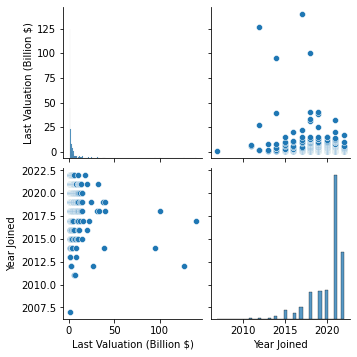

In [23]:
sns.pairplot(unicorns) 

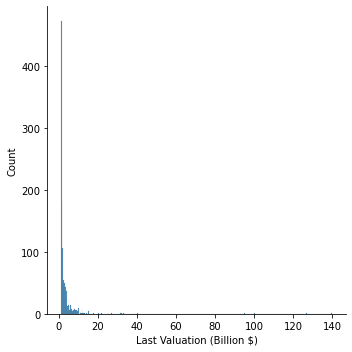

In [24]:
sns.displot(unicorns['Last Valuation (Billion $)'])

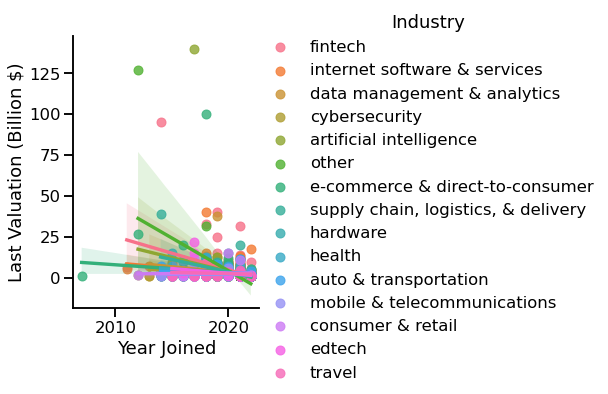

In [25]:
sns.set_context("talk")
sns.lmplot(data= unicorns,
           x="Year Joined",
           y="Last Valuation (Billion $)",hue = "Industry")

<AxesSubplot:xlabel='Last Valuation (Billion $)', ylabel='Industry'>

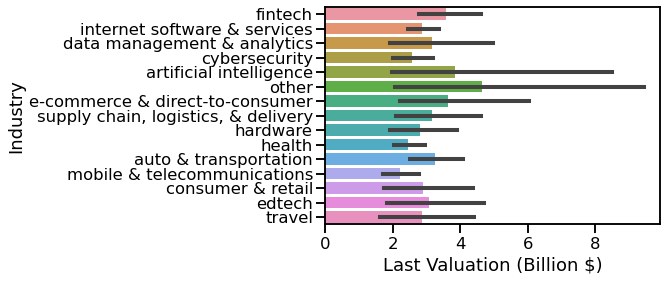

In [26]:
sns.set_context("talk")
sns.barplot(data=unicorns, y="Industry",
            x="Last Valuation (Billion $)")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'fintech'),
  Text(1, 0, 'internet software & services'),
  Text(2, 0, 'data management & analytics'),
  Text(3, 0, 'cybersecurity'),
  Text(4, 0, 'artificial intelligence'),
  Text(5, 0, 'other'),
  Text(6, 0, 'e-commerce & direct-to-consumer'),
  Text(7, 0, 'supply chain, logistics, & delivery'),
  Text(8, 0, 'hardware'),
  Text(9, 0, 'health'),
  Text(10, 0, 'auto & transportation'),
  Text(11, 0, 'mobile & telecommunications'),
  Text(12, 0, 'consumer & retail'),
  Text(13, 0, 'edtech'),
  Text(14, 0, 'travel')])

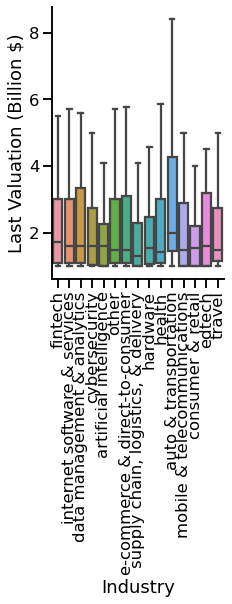

In [27]:
sns.set_context("talk")
sns.catplot(x="Industry",y="Last Valuation (Billion $)",data=unicorns,kind="box", sym="")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Last Valuation (Billion $)', ylabel='Industry'>

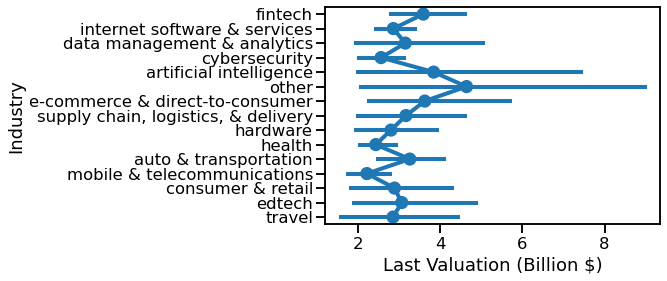

In [28]:
  sns.pointplot(data=unicorns, y="Industry",
            x="Last Valuation (Billion $)")

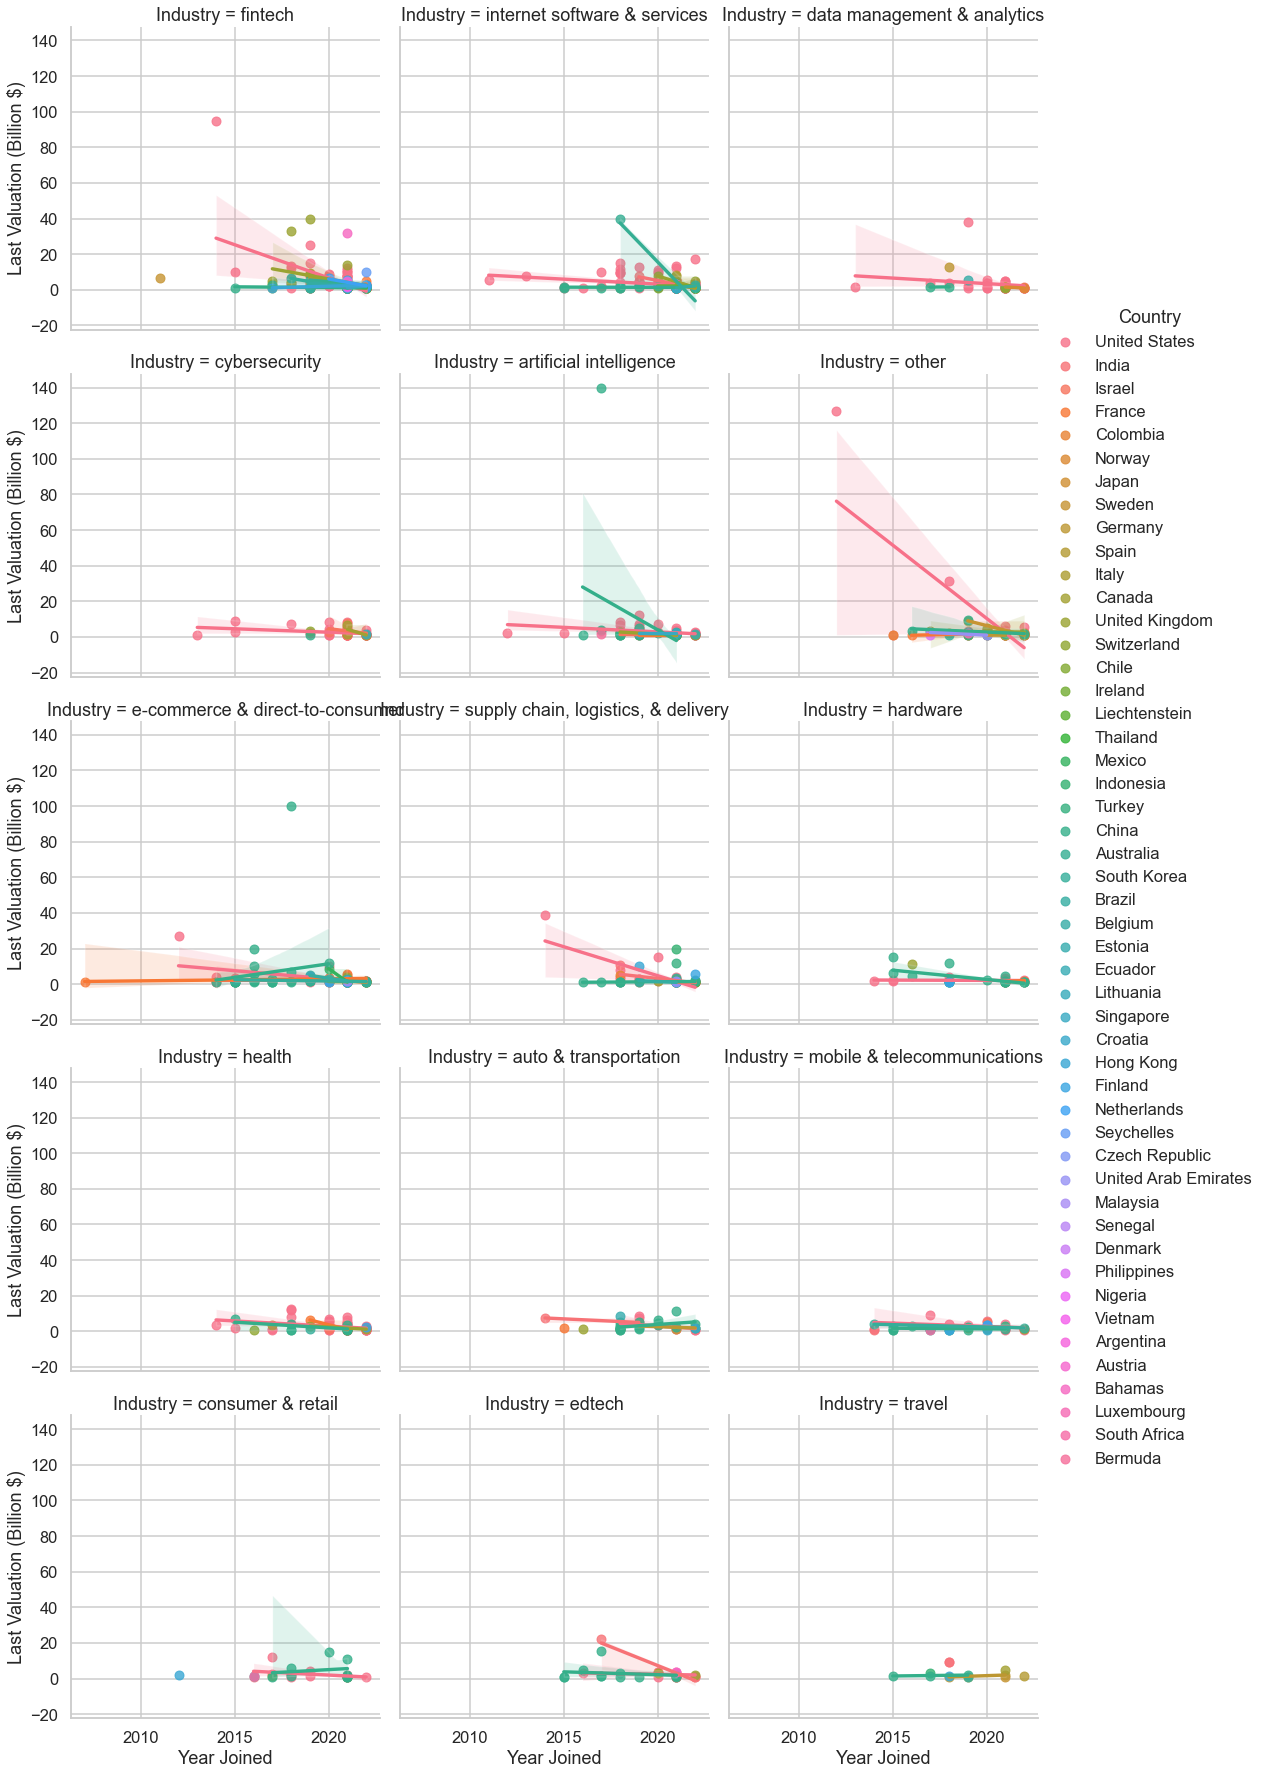

In [29]:
sns.set_style("whitegrid")
sns.lmplot(data= unicorns,
           x="Year Joined",
           y="Last Valuation (Billion $)",col = "Industry", col_wrap = 3, hue = "Country")

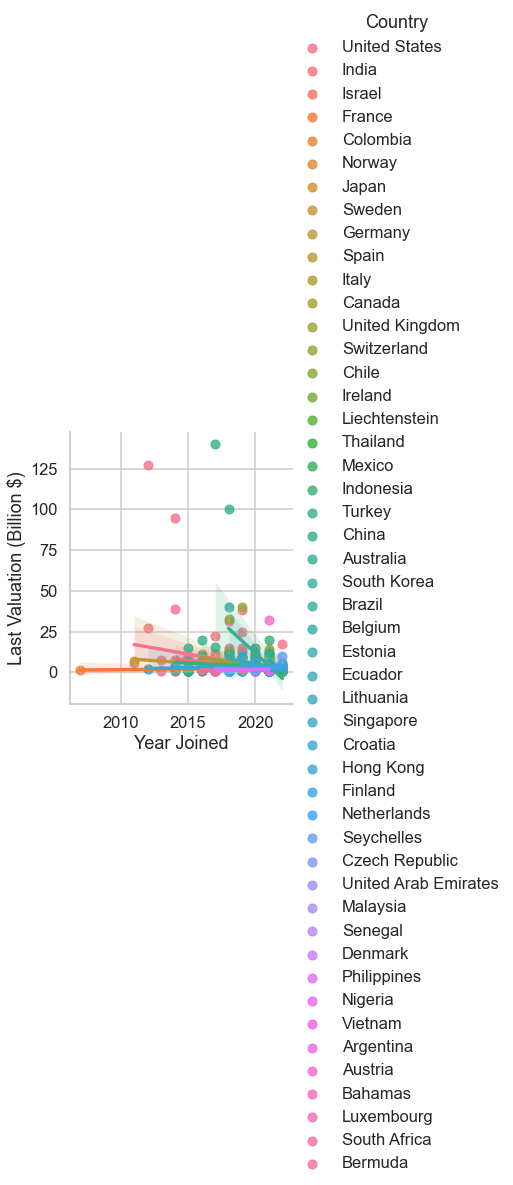

In [30]:
sns.lmplot(data= unicorns,
           x="Year Joined",
           y="Last Valuation (Billion $)",hue = "Country")

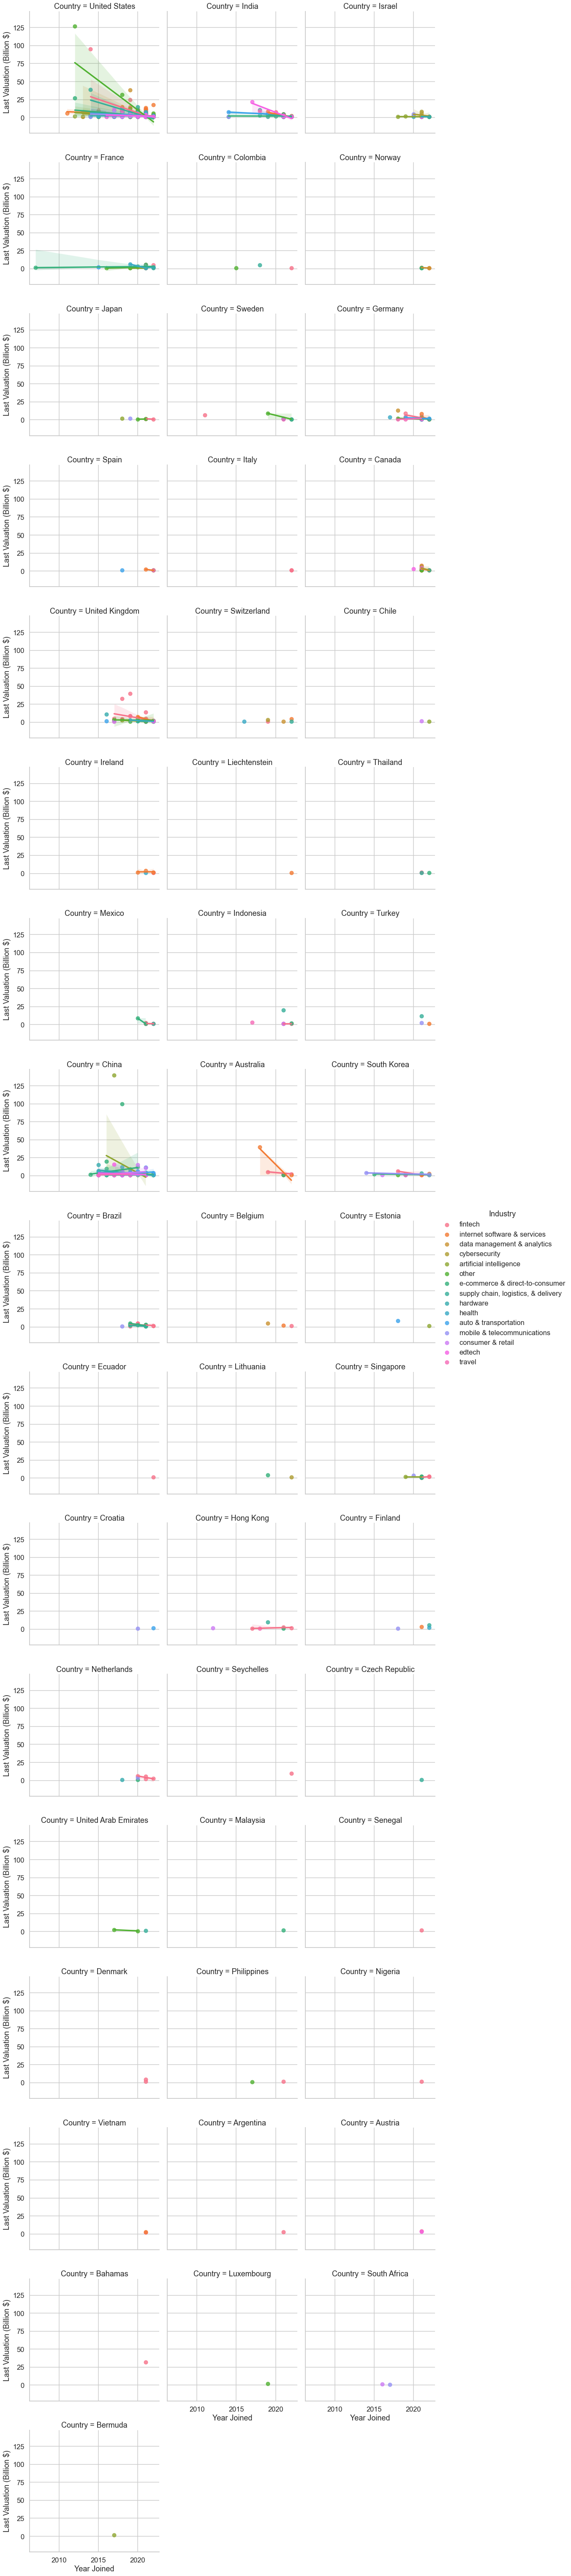

In [31]:
sns.set_style("whitegrid")
sns.lmplot(data= unicorns,
           x="Year Joined",
           y="Last Valuation (Billion $)",col = "Country", col_wrap = 3, hue = "Industry")

<AxesSubplot:>

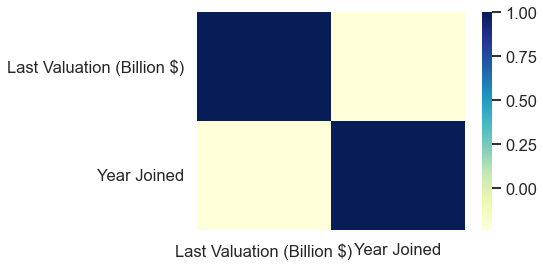

In [32]:
sns.heatmap(unicorns.corr(), cmap='YlGnBu')
 

### Descriptive analysis

#### Describing last valuation

In [33]:
unicorns["Last Valuation (Billion $)"].value_counts()

1.00    277
2.00     75
1.50     63
1.10     45
1.20     40
       ... 
7.10      1
6.20      1
5.20      1
5.36      1
6.70      1
Name: Last Valuation (Billion $), Length: 225, dtype: int64

(array([1.176e+03, 1.200e+01, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  1. ,  14.9,  28.8,  42.7,  56.6,  70.5,  84.4,  98.3, 112.2,
        126.1, 140. ]),
 <BarContainer object of 10 artists>)

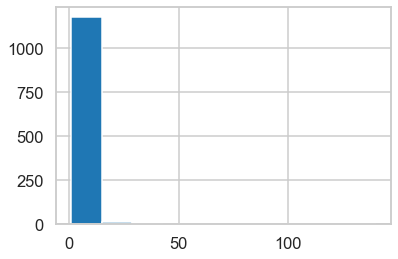

In [34]:
plt.hist(unicorns["Last Valuation (Billion $)"])

In [35]:
unicorns["Last Valuation (Billion $)"].describe()

count    1199.000000
mean        3.225588
std         7.601195
min         1.000000
25%         1.100000
50%         1.570000
75%         3.000000
max       140.000000
Name: Last Valuation (Billion $), dtype: float64

#### Sum of last valuation country wise

In [36]:
Country_total_val = unicorns.groupby("Country")["Last Valuation (Billion $)"].sum()

In [37]:
df['Country'].nunique()

49

In [38]:
Country_total_val.sort_values(ascending = False)

Country
United States           2079.57
China                    671.02
United Kingdom           208.81
India                    202.92
Germany                   80.88
France                    58.42
Australia                 54.40
Canada                    49.23
Israel                    49.02
Brazil                    39.08
South Korea               33.96
Bahamas                   32.00
Indonesia                 29.13
Sweden                    23.62
Singapore                 22.91
Netherlands               22.46
Hong Kong                 20.35
Mexico                    18.70
Turkey                    15.77
Finland                   12.46
Switzerland               12.30
Ireland                   10.05
Seychelles                10.00
Estonia                    9.90
Belgium                    8.95
Japan                      8.82
Austria                    7.61
Colombia                   7.40
Spain                      7.15
Denmark                    6.70
Lithuania                  6.13


(array([47.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 2.088570e+02, 4.167140e+02, 6.245710e+02,
        8.324280e+02, 1.040285e+03, 1.248142e+03, 1.455999e+03,
        1.663856e+03, 1.871713e+03, 2.079570e+03]),
 <BarContainer object of 10 artists>)

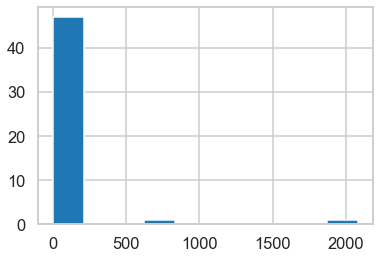

In [39]:
plt.hist(Country_total_val)

In [40]:
Country_total_val.describe()

count      49.000000
mean       78.928163
std       308.911638
min         1.000000
25%         3.000000
50%         8.950000
75%        29.130000
max      2079.570000
Name: Last Valuation (Billion $), dtype: float64

#### Total number of unicorns Industry wise

In [41]:
unicorns["Industry"].value_counts()

fintech                                253
internet software & services           231
e-commerce & direct-to-consumer        109
health                                  95
artificial intelligence                 87
supply chain, logistics, & delivery     68
other                                   64
cybersecurity                           58
data management & analytics             45
mobile & telecommunications             39
hardware                                38
auto & transportation                   38
edtech                                  32
consumer & retail                       28
travel                                  14
Name: Industry, dtype: int64

#### Total number of unicorns country wise

In [42]:
country_total_unicorns = unicorns.Country.value_counts()

In [43]:
print(country_total_unicorns)

United States           645
China                   173
India                    70
United Kingdom           47
Germany                  29
France                   24
Israel                   23
Canada                   19
South Korea              16
Brazil                   16
Singapore                14
Mexico                    8
Sweden                    8
Australia                 8
Hong Kong                 7
Netherlands               7
Indonesia                 7
Japan                     6
Ireland                   6
Switzerland               6
Norway                    5
Spain                     5
Finland                   4
Thailand                  3
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
South Africa              2
Vietnam                   2
Philippines               2
Denmark                   2
Italy                     2
Croatia                   2
Lithuania           

In [44]:
country_total_unicorns.index

Index(['United States', 'China', 'India', 'United Kingdom', 'Germany',
       'France', 'Israel', 'Canada', 'South Korea', 'Brazil', 'Singapore',
       'Mexico', 'Sweden', 'Australia', 'Hong Kong', 'Netherlands',
       'Indonesia', 'Japan', 'Ireland', 'Switzerland', 'Norway', 'Spain',
       'Finland', 'Thailand', 'Turkey', 'Colombia', 'Belgium',
       'United Arab Emirates', 'Austria', 'South Africa', 'Vietnam',
       'Philippines', 'Denmark', 'Italy', 'Croatia', 'Lithuania', 'Estonia',
       'Chile', 'Seychelles', 'Czech Republic', 'Malaysia', 'Senegal',
       'Ecuador', 'Nigeria', 'Argentina', 'Liechtenstein', 'Bahamas',
       'Luxembourg', 'Bermuda'],
      dtype='object')

In [45]:
country_total_unicorns.values

array([645, 173,  70,  47,  29,  24,  23,  19,  16,  16,  14,   8,   8,
         8,   7,   7,   7,   6,   6,   6,   5,   5,   4,   3,   3,   3,
         3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

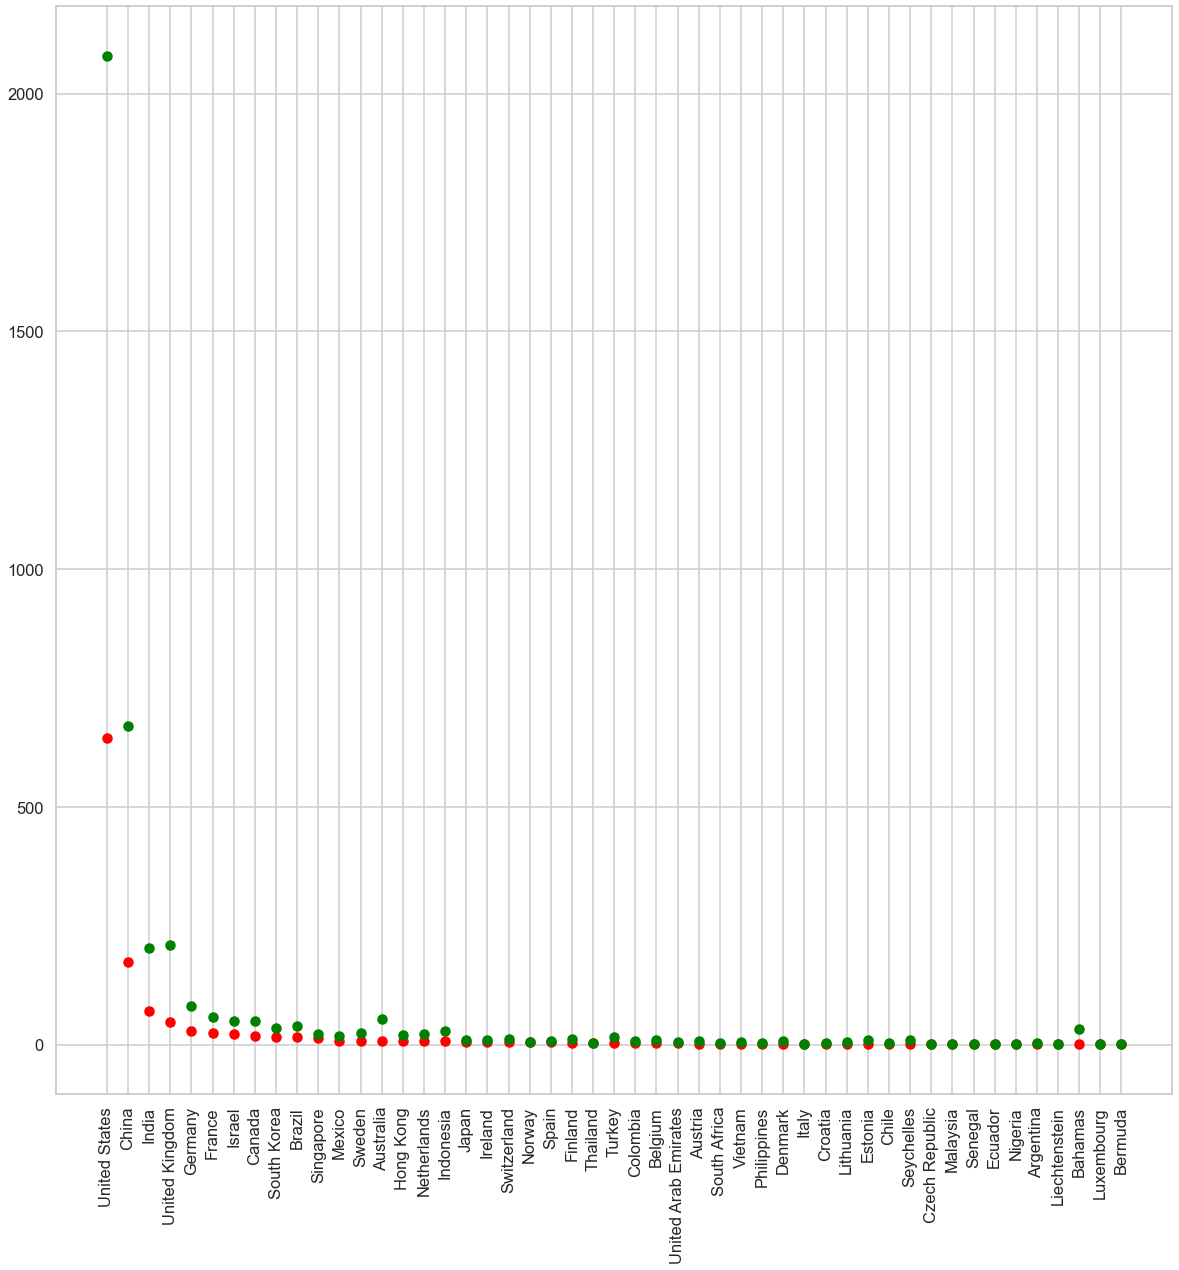

In [46]:
plt.figure(figsize=(20, 20))
plt.scatter(country_total_unicorns.index,  country_total_unicorns.values, color = "red")
plt.scatter(Country_total_val.index, Country_total_val.values, color = "green")
plt.xticks(rotation = 90)

In [47]:
unicorns.groupby(['Country','City']).agg({'Company':'count','Last Valuation (Billion $)':'sum'})

Company  Last Valuation (Billion $)
Country       City                                                 
Argentina     Buenos Aires            1                        2.45
Australia     Alexandria              1                        1.00
              Brisbane                1                        1.00
              Melbourne               2                        6.80
              Richmond                1                        1.50
...                                 ...                         ...
United States Washington DC           2                        2.15
              Westerville             1                        3.00
              Wilmington              2                        2.00
              Zephyr Cove             1                        1.50
Vietnam       Ho Chi Minh City        2                        5.27

[285 rows x 2 columns]

In [48]:
from ast import literal_eval
literal_eval(unicorns.Investors.iloc[1])

['Accel', '14W', 'GS Growth']

In [49]:
inv = unicorns['Investors'].apply(lambda x: literal_eval(x))

In [50]:
inve = []
for i in inv:
    for j in range(len(i)):
        inve.append(i[j])

In [51]:
len(inve)


3395

In [52]:
len(set(inve))

1394

In [53]:
from collections import Counter

c = Counter(inve)

print( c )

Counter({'Accel': 64, 'Andreessen Horowitz': 60, 'Tiger Global Management': 57, 'Insight Partners': 54, 'Sequoia Capital': 53, 'Sequoia Capital China': 48, 'General Catalyst': 41, 'Lightspeed Venture Partners': 40, 'SoftBank Group': 35, 'Index Ventures': 32, 'Tencent Holdings': 31, 'General Atlantic': 30, 'Bessemer Venture Partners': 28, 'Google Ventures': 27, 'IDG Capital': 27, 'Sequoia Capital India': 25, 'New Enterprise Associates': 25, 'Coatue Management': 24, 'Y Combinator': 23, 'Kleiner Perkins Caufield & Byers': 22, 'DST Global': 22, 'Khosla Ventures': 20, 'Founders Fund': 19, 'Battery Ventures': 18, 'Norwest Venture Partners': 17, 'GGV Capital': 17, 'Qiming Venture Partners': 17, 'Thrive Capital': 17, 'Greylock Partners': 16, 'Goldman Sachs': 16, 'Bain Capital Ventures': 15, 'CRV': 15, 'Redpoint Ventures': 13, 'Benchmark': 12, 'Warburg Pincus': 12, 'Greycroft': 12, 'Institutional Venture Partners': 12, 'Matrix Partners China': 12, 'Qualcomm Ventures': 12, 'Blackstone': 11, 'Glo

In [54]:
sorted_inve = sorted(c.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_inve)

print(converted_dict)

{'Accel': 64, 'Andreessen Horowitz': 60, 'Tiger Global Management': 57, 'Insight Partners': 54, 'Sequoia Capital': 53, 'Sequoia Capital China': 48, 'General Catalyst': 41, 'Lightspeed Venture Partners': 40, 'SoftBank Group': 35, 'Index Ventures': 32, 'Tencent Holdings': 31, 'General Atlantic': 30, 'Bessemer Venture Partners': 28, 'Google Ventures': 27, 'IDG Capital': 27, 'Sequoia Capital India': 25, 'New Enterprise Associates': 25, 'Coatue Management': 24, 'Y Combinator': 23, 'Kleiner Perkins Caufield & Byers': 22, 'DST Global': 22, 'Khosla Ventures': 20, 'Founders Fund': 19, 'Battery Ventures': 18, 'Norwest Venture Partners': 17, 'GGV Capital': 17, 'Qiming Venture Partners': 17, 'Thrive Capital': 17, 'Greylock Partners': 16, 'Goldman Sachs': 16, 'Bain Capital Ventures': 15, 'CRV': 15, 'Redpoint Ventures': 13, 'Benchmark': 12, 'Warburg Pincus': 12, 'Greycroft': 12, 'Institutional Venture Partners': 12, 'Matrix Partners China': 12, 'Qualcomm Ventures': 12, 'Blackstone': 11, 'Global Foun

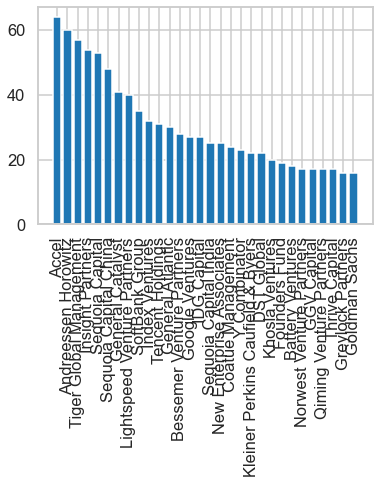

In [55]:
labels = []
sizes = []

for x, y in converted_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.bar(labels[:30],sizes[:30])
plt.xticks(rotation = 90)
plt.show()